# Alcohol & it's effect on students.
### <span style="color:#83898b">*Understanding if alcohol and students grades have a positive correlation*</span>


Alcohol is a psychoactive substance frequently referred to by the chemical term ethanol. It is the main component of beverages including beer, wine, and distilled spirits. It is one of the most traditional and widely used recreational drugs and has the same effects as alcohol intoxication. While being a drink it is known to be extrmely addicitive to certain people and others take this becuase of peer presure even though it is known to be bad for the body so, it brings to question if this really affects us students as much as it is made to seem, i will explore the relationship of alcohol and students grades as well as other factors that play into the mix.
![Image of Alcohol](https://wallup.net/wp-content/uploads/2019/09/929632-liquor-alcohol-spirits-poster-drinks-drink-whiskey.jpg)
<sup>Wallup, Public domain, via [Wallup.net] https://wallup.net/wp-content/uploads/2019/09/929632-liquor-alcohol-spirits-poster-drinks-drink-whiskey.jpg)</sup>

## Methods
### Data Collection

This dataset is maintained publicly at [Kaggle](https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study), a free online resource of general datasets [1].

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data
AlcoholData = pd.read_csv('https://raw.githubusercontent.com/BabaDee01/Data_Analysis/main/Maths.csv')
print(AlcoholData.shape)
AlcoholData

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data Cleaning 
The dataset had a lot of unwanted colums that made the data biased and some hard to understand rows and columns so i renamed the rows, columns and reduced to the colums to a needed amount of colunms 

In [3]:
print(f"Null values of the Dataset :")
AlcoholData.isna().sum().to_frame()

Null values of the Dataset :


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


As seen above there were no null values which is nice

In [4]:
AlcoholData = AlcoholData.drop(['school', 'traveltime', 'famrel', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup', 'address', 'schoolsup', 'paid','Pstatus','activities','internet'], axis=1)

In [5]:
AlcoholData.columns = ["sex","age","reason","studytime","pastfails","wenttonursery","wantshigheredu","romantic","hasfreetime","goout","workday alcohol consumption", "weekend alcohol consumption", "health", "absences", "first period grade", "second period grade", "final grade"]
AlcoholData.tail()

,sex,age,reason,studytime,pastfails,wenttonursery,wantshigheredu,romantic,hasfreetime,goout,workday alcohol consumption,weekend alcohol consumption,health,absences,first period grade,second period grade,final grade
390,M,20,course,2,2,yes,yes,no,5,4,4,5,4,11,9,9,9
391,M,17,course,1,0,no,yes,no,4,5,3,4,2,3,14,16,16
392,M,21,course,1,3,no,yes,no,5,3,3,3,3,3,10,8,7
393,M,18,course,1,0,no,yes,no,4,1,3,4,5,0,11,12,10
394,M,19,course,1,0,yes,yes,no,2,3,3,3,5,5,8,9,9


## Analyses
---
I cleaned my data to make it as fair and unbiased as it could which is why i eliminated rows that went with the contrary.I will first relate the amount of past fails to the amount of alcohol consumed, i will then analyze the relationship between the reason for studying, alcohol consumption and their final grade, as the final grade has a strong correlation between first and second period grade. I chose to study "The reason for studying" becuase while reasearching i found out that goal driven people are often more serious so the data would make more sense.

In [6]:
print(f"Summary Of The data set :")
AlcoholData.describe()

Summary Of The data set :


,age,studytime,pastfails,hasfreetime,goout,workday alcohol consumption,weekend alcohol consumption,health,absences,first period grade,second period grade,final grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
AlcoholData['alcohol'] = AlcoholData['workday alcohol consumption'] + AlcoholData['weekend alcohol consumption']

<AxesSubplot:xlabel='pastfails', ylabel='alcohol'>

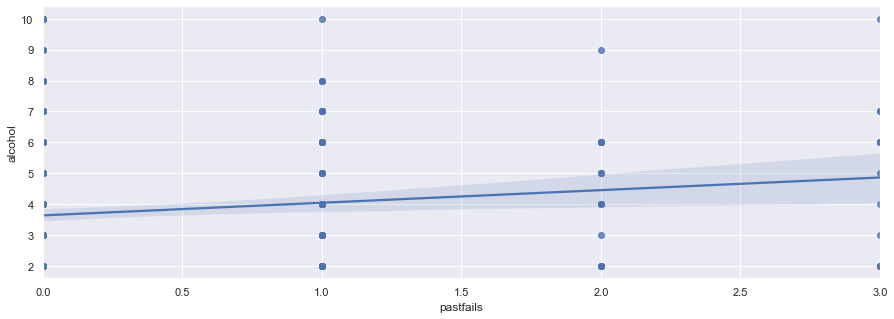

In [8]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.regplot(x=AlcoholData['pastfails'], y=AlcoholData['alcohol'])

---
In the figure above, there seems to be a mild postive correlation between the past fails and the amount of alcohol consumed, let's explore this further by calculating the correlation between them.

In [9]:
AlcoholData['pastfails'].corr(AlcoholData['alcohol'])

0.15320332600501813

As suspected, there is a mild positive correlation between past failures and the amount of alcohol consumed, but we can't sum all of the past failures to alcohol so we have to identify the relationships of the outliers to failures


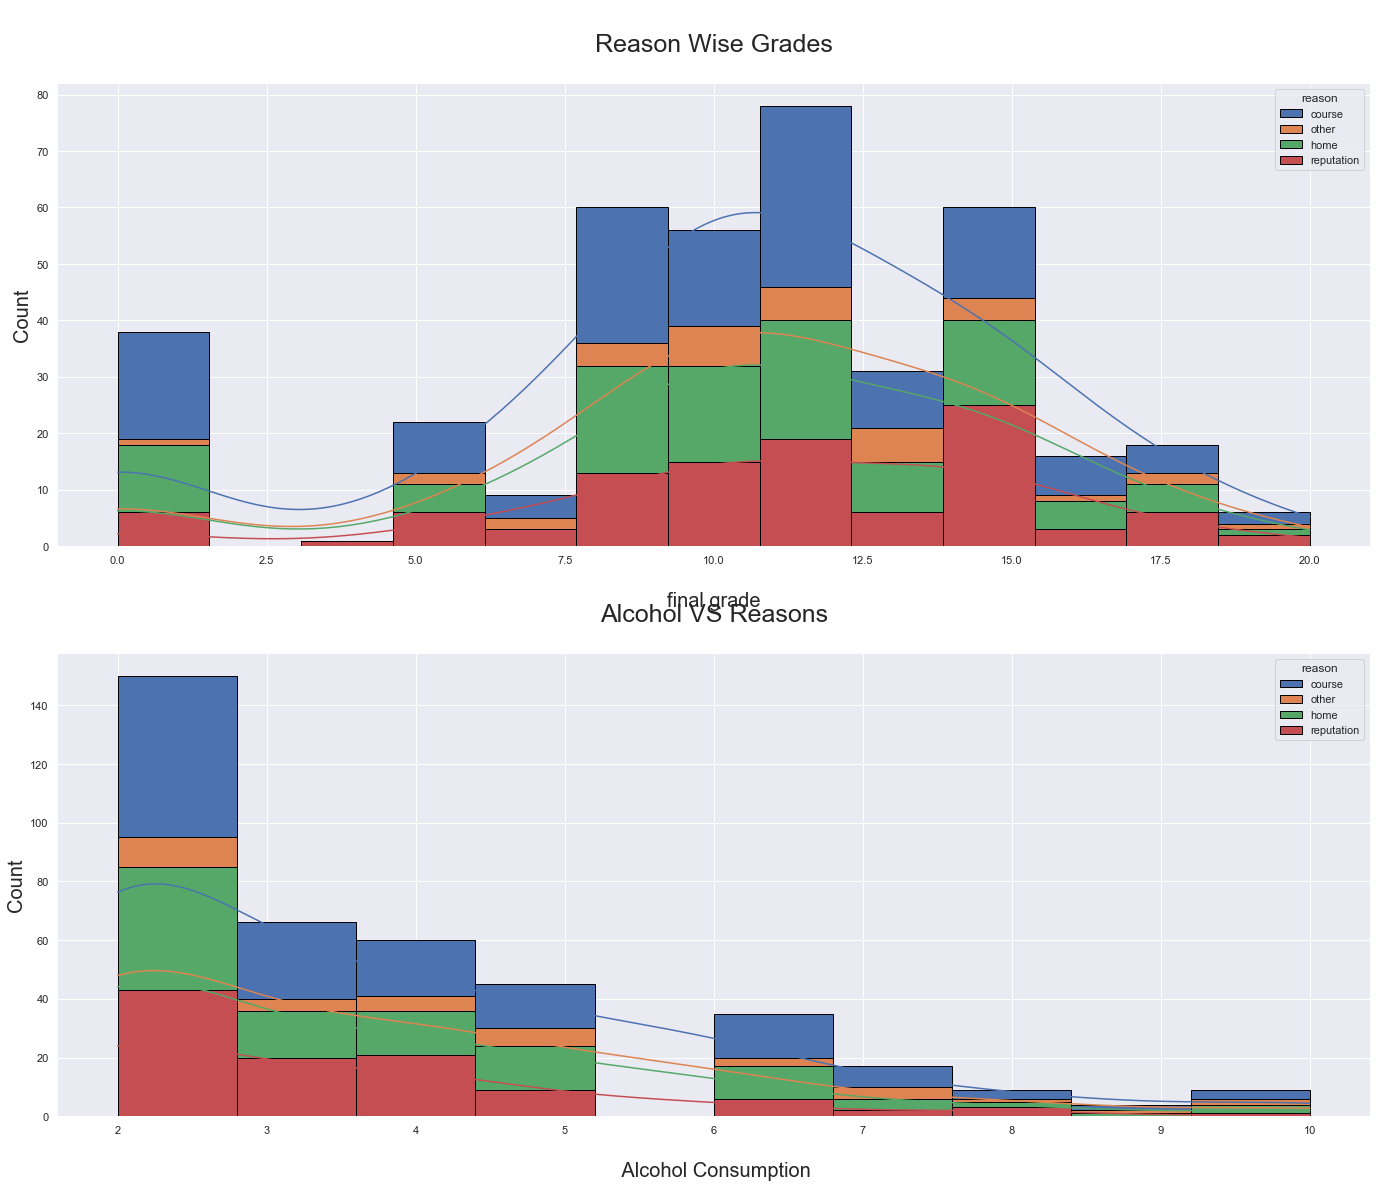

In [10]:
_, axes = plt.subplots(2,1,figsize=(21,17),sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=AlcoholData,x="final grade",hue="reason",multiple="stack",ax=axes[0],kde=True,alpha=1,fill=True,edgecolor="black")
axes[0].set_title("\nReason Wise Grades\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nfinal grade",fontsize=20)

sns.histplot(data=AlcoholData,x="alcohol",hue="reason",multiple="stack",ax=axes[1],kde=True,alpha=1,fill=True,edgecolor="black")
axes[1].set_title("Alcohol VS Reasons\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\n Alcohol Consumption",fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()


From we the graph we can draw that students  that came to school because they like the course get average to high grades, students that have an other reason for studying mostly get low - average grades and rarely get high grades, students that study becuase of their situation at home get low - average grades and get high grades sometimes, while students that  are studying to uphold a reputation get from average to high grades and rarely get low grades.

I made a graph to identify the amount of alcohol taken in by each denomination of students in my data and suprisingly, i found out that most studnets don't drink a lot of alcohol and the students that drink more are those who study becuase they like their course or have a reputation to uphold which makes sense.  

So, let's see how these three vairables relate which each other.

<AxesSubplot:xlabel='alcohol', ylabel='final grade'>

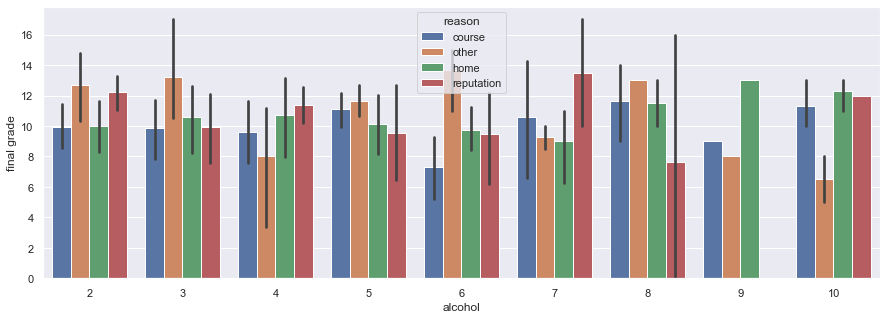

In [11]:
grouped_data = AlcoholData.groupby(['final grade','alcohol', 'reason']).size().unstack().fillna(value= 0)
grouped_data #to understand the degree of errors

sns.set(rc={"figure.figsize":(15, 5)})
sns.barplot(x = "alcohol", y = "final grade", hue = "reason", data = AlcoholData)

The grouped data made the relationship between alcohol, the final grade and their reason for studying very apparent and we find out that alcohol has a very small to mild conrrelation to bad grades even when taken in excess.

## Discussion

In this assignment, I explored data from the Alcohol and it's effcts on student grades, and focused on relationships between the reason for studting and Alcohol Consumption on their final grades. An exploratory analysis supported the hypotheses that both past fails were related to Alcohol Consumption. I found out that most of the people that passed were either in school because of their reputation or they liked the course, i then compared those people to the amount of alcohol they took and found that they took less alcohol. They were also proofs to low grades at higher alcohol consumption rates. I then deicded to accurately determine the realtion to grades with alcohol and the reason for studying and concluded that alcohol has very small to mild correlation even in excess.

## References
1. Source data - https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 